In [1]:
#PREDICTING STUDENT PERFORMANCE USING MULTIPLE REGRESSION  by k.phanindra reddy-1454

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score  , mean_absolute_error
from sklearn.metrics import confusion_matrix

plt.style.use("fivethirtyeight")

In [3]:
# Data Source---https://www.kaggle.com/datasets/nikhil7280/student-performance-multiplelinear-regression 

In [4]:
df=pd.read_csv(r"C:\Users\Phani\Downloads\Student_Performance.csv")

In [5]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [47]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [7]:
df.duplicated().sum()

127

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df["Hours Studied"].value_counts()

Hours Studied
1    1133
6    1122
7    1118
3    1110
9    1099
2    1077
8    1074
4    1071
5    1069
Name: count, dtype: int64

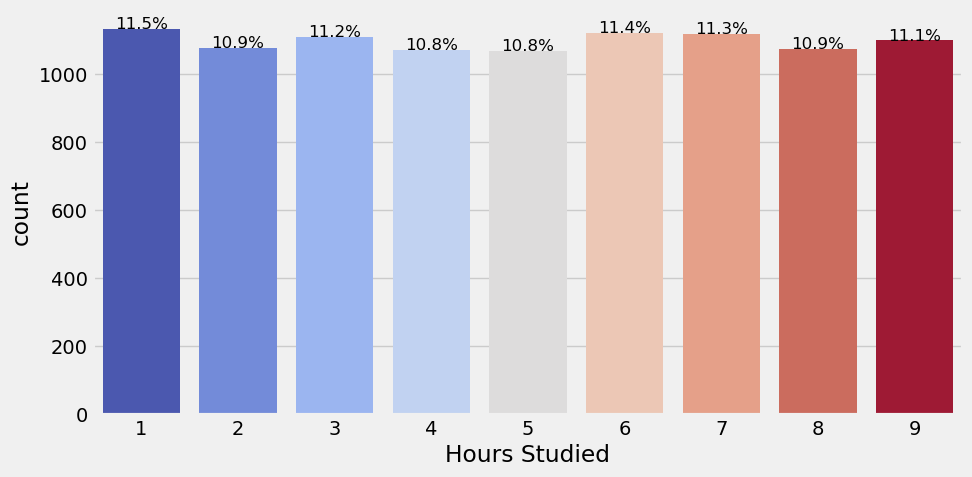

In [10]:
plt.figure(figsize=(10,5))


bar_plot = sns.countplot(x="Hours Studied", data=df, hue="Hours Studied", palette="coolwarm", legend=False)

total = len(df["Hours Studied"])

for p in bar_plot.patches:
    bar_plot.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5,
                  f'{(p.get_height() / total) * 100:.1f}%', ha='center', fontsize=12)

plt.show()


In [11]:
df["Previous Scores"].describe()

count    9873.000000
mean       69.441102
std        17.325601
min        40.000000
25%        54.000000
50%        69.000000
75%        85.000000
max        99.000000
Name: Previous Scores, dtype: float64

<Axes: xlabel='Previous Scores', ylabel='Count'>

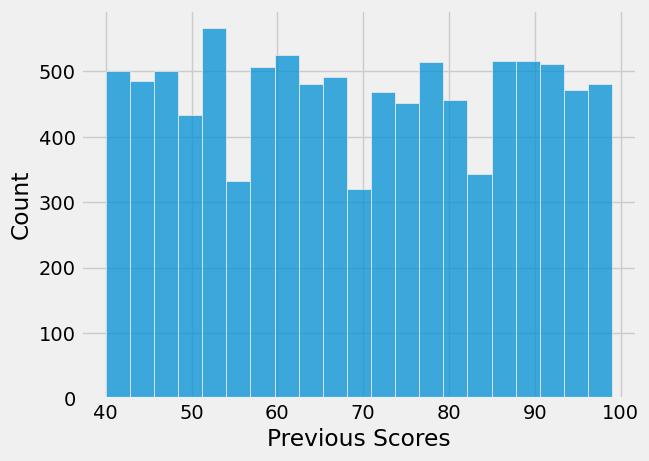

In [12]:
sns.histplot(x= df["Previous Scores"])

In [13]:
cut_series = pd.cut(df["Previous Scores"], bins=[40, 50, 60, 70, 80, 90, 100], labels=['40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])
value_counts = cut_series.value_counts().sort_index()

value_counts.reset_index()

,Previous Scores,count
0,40-50,1609
1,50-60,1726
2,60-70,1637
3,70-80,1587
4,80-90,1680
5,90-100,1463


In [14]:
df["Extracurricular Activities"].value_counts()

Extracurricular Activities
No     4986
Yes    4887
Name: count, dtype: int64

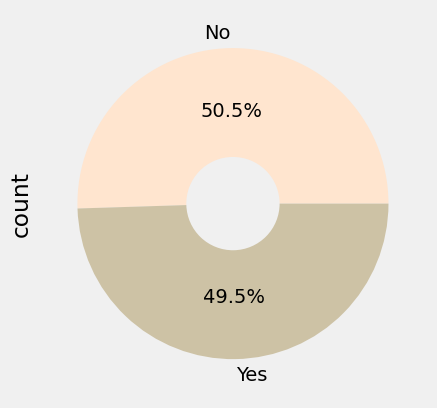

In [15]:
df["Extracurricular Activities"].value_counts().plot(kind ="pie" , autopct='%1.1f%%', colors=["#FFE5CF" , "#CDC2A5"], explode=(0,0), wedgeprops=dict(width=0.7));

In [16]:
df["Sleep Hours"].describe()

count    9873.000000
mean        6.531652
std         1.697683
min         4.000000
25%         5.000000
50%         7.000000
75%         8.000000
max         9.000000
Name: Sleep Hours, dtype: float64

In [17]:
df["Sleep Hours"].value_counts()

Sleep Hours
8    1784
7    1653
6    1645
9    1606
4    1605
5    1580
Name: count, dtype: int64

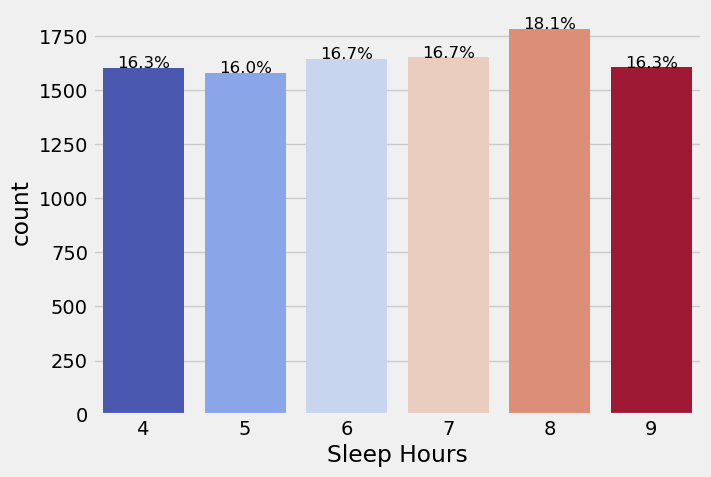

In [18]:
plt.figure(figsize=(7,5))


bar_plot = sns.countplot(x="Sleep Hours", data=df, hue="Sleep Hours", palette="coolwarm", legend=False)

total = len(df["Sleep Hours"])

for p in bar_plot.patches:
    bar_plot.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5,
                  f'{(p.get_height() / total) * 100:.1f}%', ha='center', fontsize=12)

plt.show()


In [19]:
df["Sample Question Papers Practiced"].value_counts()

Sample Question Papers Practiced
6    1046
9    1038
3    1020
5    1018
8    1016
1     969
7     967
4     945
0     937
2     917
Name: count, dtype: int64

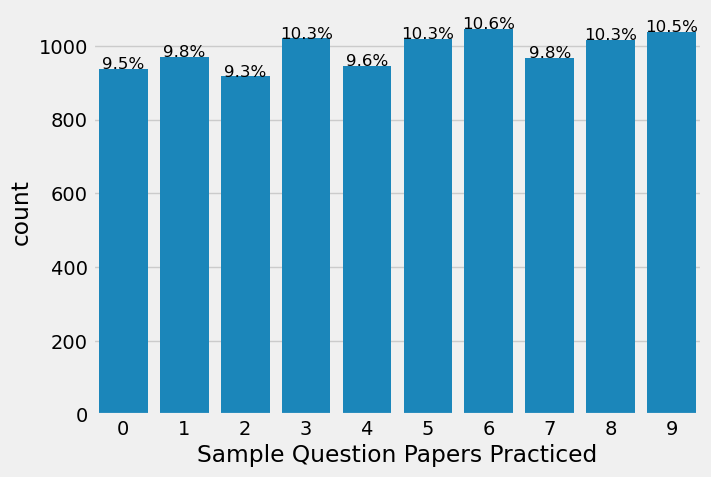

In [20]:
plt.figure(figsize=(7,5))
bar_plot = sns.countplot(x="Sample Question Papers Practiced", data=df)
total = len(df["Sample Question Papers Practiced"])

for p in bar_plot.patches:
    bar_plot.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5,
                  f'{(p.get_height() / total) * 100:.1f}%', ha='center', fontsize=12)

plt.show()

In [21]:
df["Performance Index"].describe()

count    9873.000000
mean       55.216651
std        19.208570
min        10.000000
25%        40.000000
50%        55.000000
75%        70.000000
max       100.000000
Name: Performance Index, dtype: float64

<Axes: xlabel='Performance Index', ylabel='Count'>

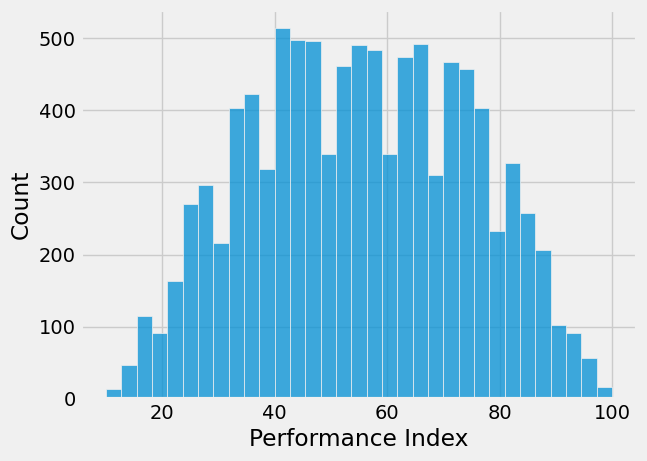

In [22]:
sns.histplot(x= df["Performance Index"])

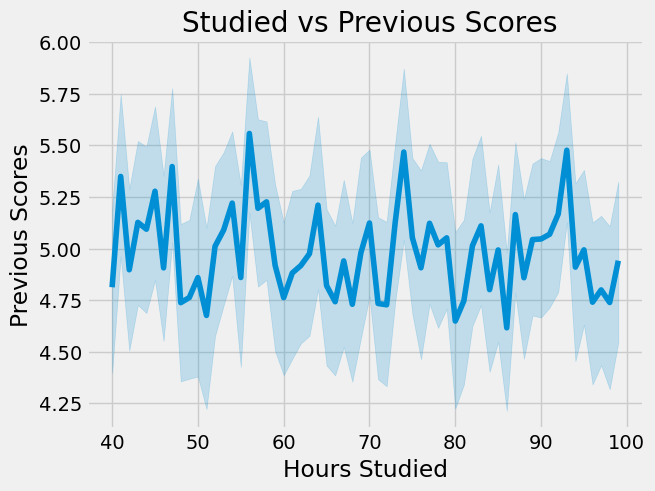

In [23]:
sns.lineplot(y=df['Hours Studied'], x=df['Previous Scores'])
plt.xlabel('Hours Studied')
plt.ylabel('Previous Scores')
plt.title(' Studied vs Previous Scores')
plt.show()

In [24]:
df.groupby(["Extracurricular Activities"])["Hours Studied"].value_counts().unstack()

Hours Studied,1,2,3,4,5,6,7,8,9
Extracurricular Activities,,,,,,,,,
No,587,559,553,539,524,529,579,583,533
Yes,546,518,557,532,545,593,539,491,566


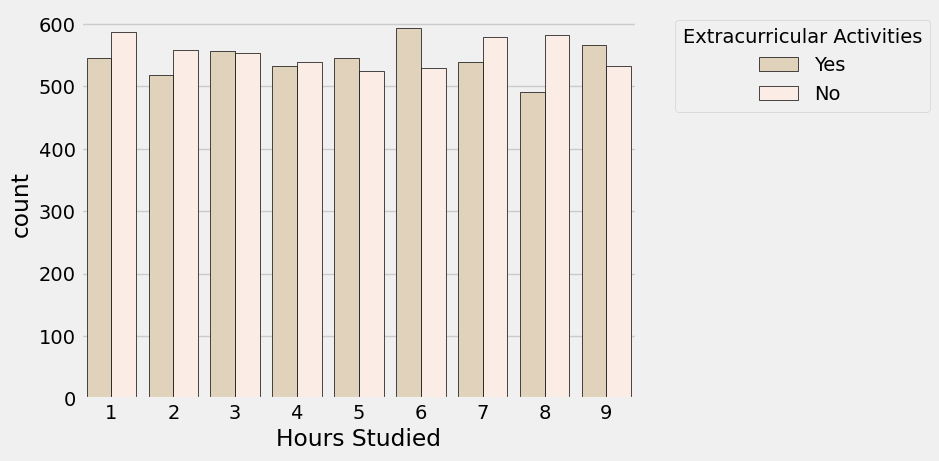

In [25]:
sns.countplot(data=df, hue="Extracurricular Activities", x="Hours Studied" ,  palette=["#E7D4B5" ,"#FEECE2"] ,edgecolor="black")
plt.legend(title='Extracurricular Activities', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [26]:
grouped_data= df.groupby("Hours Studied")["Sleep Hours"].value_counts().unstack()
grouped_data

Sleep Hours,4,5,6,7,8,9
Hours Studied,,,,,,
1,170,177,175,199,233,179
2,200,157,200,166,176,178
3,192,177,182,178,188,193
4,166,163,180,186,207,169
5,163,182,183,181,205,155
6,207,187,183,182,190,173
7,168,170,184,189,211,196
8,168,197,195,172,175,167
9,171,170,163,200,199,196


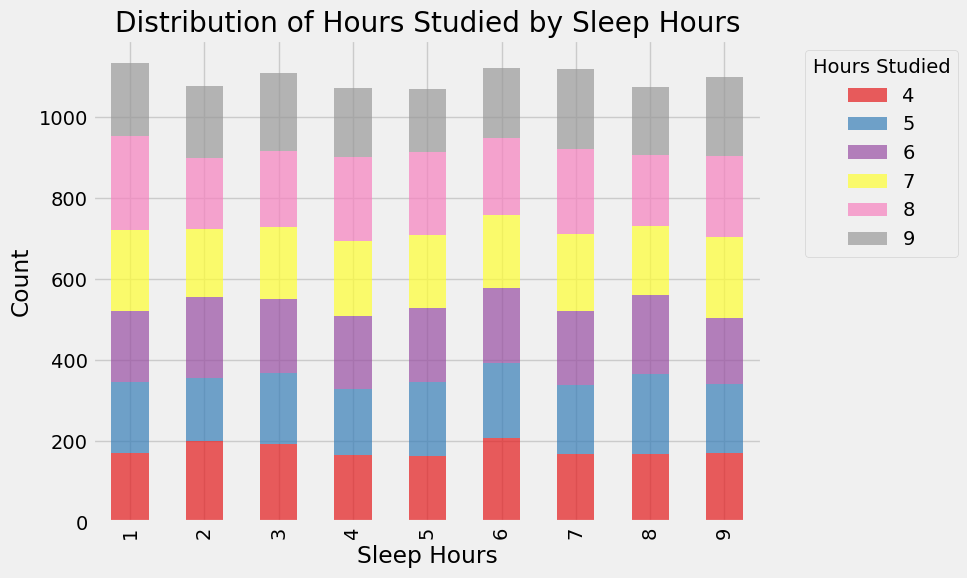

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

grouped_data = df.groupby("Hours Studied")["Sleep Hours"].value_counts().unstack(fill_value=0)


plt.figure(figsize=(10, 6))


grouped_data.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='Set1', alpha=0.7)


plt.title('Distribution of Hours Studied by Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Count')
plt.legend(title='Hours Studied', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()

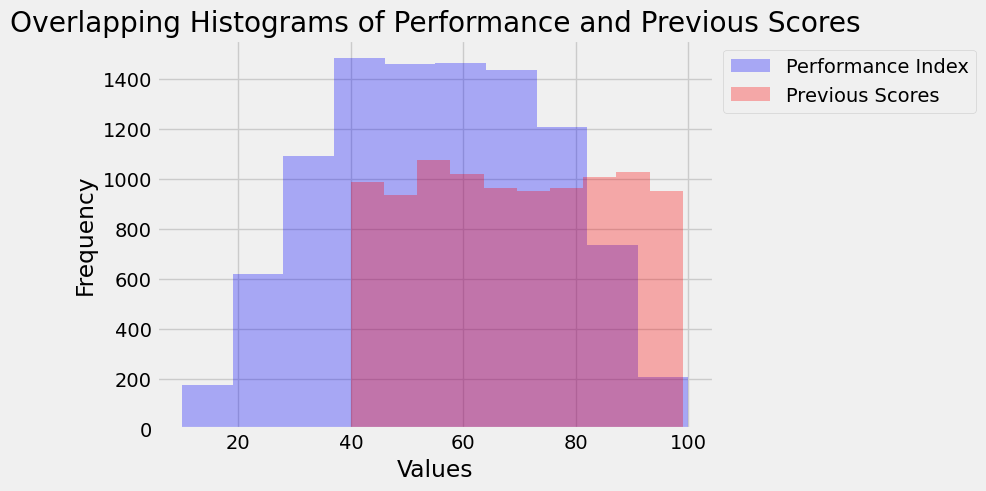

In [28]:
papers_practiced = df['Performance Index']
previous_scores = df['Previous Scores']

plt.hist(papers_practiced, bins=10, alpha=0.3, label='Performance Index', color='blue')
plt.hist(previous_scores, bins=10, alpha=0.3, label='Previous Scores', color='red')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Overlapping Histograms of Performance and Previous Scores')
plt.legend( bbox_to_anchor=(1, 1), loc='upper left')

plt.show()


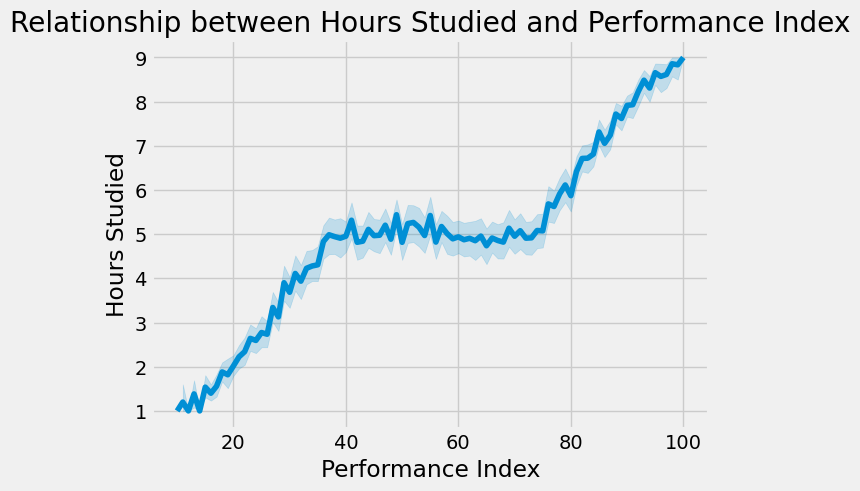

In [29]:
sns.lineplot(data=df, y='Hours Studied', x='Performance Index')

plt.title('Relationship between Hours Studied and Performance Index')
plt.ylabel('Hours Studied')
plt.xlabel('Performance Index')
plt.show()

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

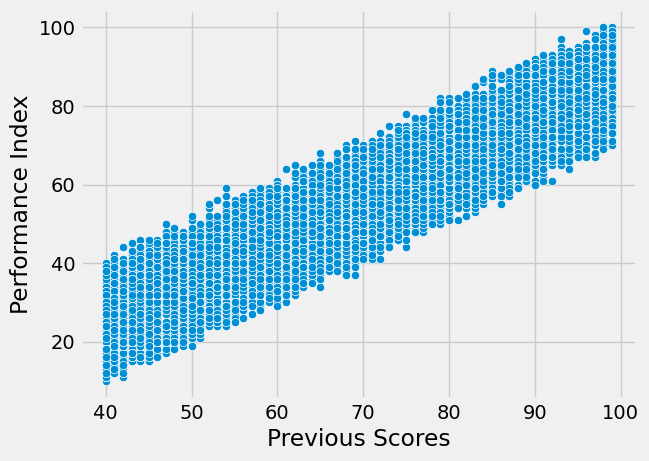

In [30]:
sns.scatterplot(x='Previous Scores' , y='Performance Index', data=df)

In [31]:
#Machine learning
label_encoder = LabelEncoder()

df['Extracurricular Activities'] = label_encoder.fit_transform(df['Extracurricular Activities'])

In [32]:
X = df.drop(columns=['Performance Index'])  
y = df['Performance Index']  

In [33]:
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [34]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 9873, dtype: float64

In [35]:
#Model Creation and Training 

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.drop(["Extracurricular Activities"] ,axis=1))
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [37]:
column= X[["Extracurricular Activities"]]
X_combined = np.hstack((X_scaled, column.values))

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_scaled, test_size=0.2, random_state=42)

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

In [41]:
r2 = r2_score(y_test, y_pred)  
print(f"R² Score: {r2}")

R² Score: 0.9884301209927054


In [42]:
mse = mean_squared_error(y_test, y_pred)  
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error(MSE): {mse}")

Mean Absolute Error (MAE): 0.08574577950768571
Mean Squared Error(MSE): 0.011671265615520255


In [43]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.10803363187230287


In [45]:
input_data = np.array([[7, 99, 0, 9, 1]]) 

y_pred = model.predict(input_data)

print("Predicted Performance Index:", y_pred[0])

Predicted Performance Index: [93.89895519]
